In [1]:
# brest  cancer

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.preprocessing import MinMaxScaler,LabelEncoder , OneHotEncoder,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, classification_report,
                             confusion_matrix)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, roc_curve, auc
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 1. Load the Dataset
print("Loading Breast Cancer Dataset...")
data = load_breast_cancer()


Loading Breast Cancer Dataset...


In [8]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [10]:
x=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target

In [11]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
print("\nDataset Shape:", x.shape)
print("\nFeature Names:")
print(data.feature_names)
print("\nTarget Names:", data.target_names)


Dataset Shape: (569, 30)

Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names: ['malignant' 'benign']


In [9]:
# 2. Basic Data Analysis
print("\nBasic Data Analysis:")
print("\nFeature Statistics:")
print(x.describe())


Basic Data Analysis:

Feature Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380       

In [13]:
# Check for missing values
print("\nMissing Values:")
print(x.isnull().sum())


Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [14]:
# 3. Exploratory Data Analysis
print("\nPerforming Exploratory Data Analysis...")


Performing Exploratory Data Analysis...


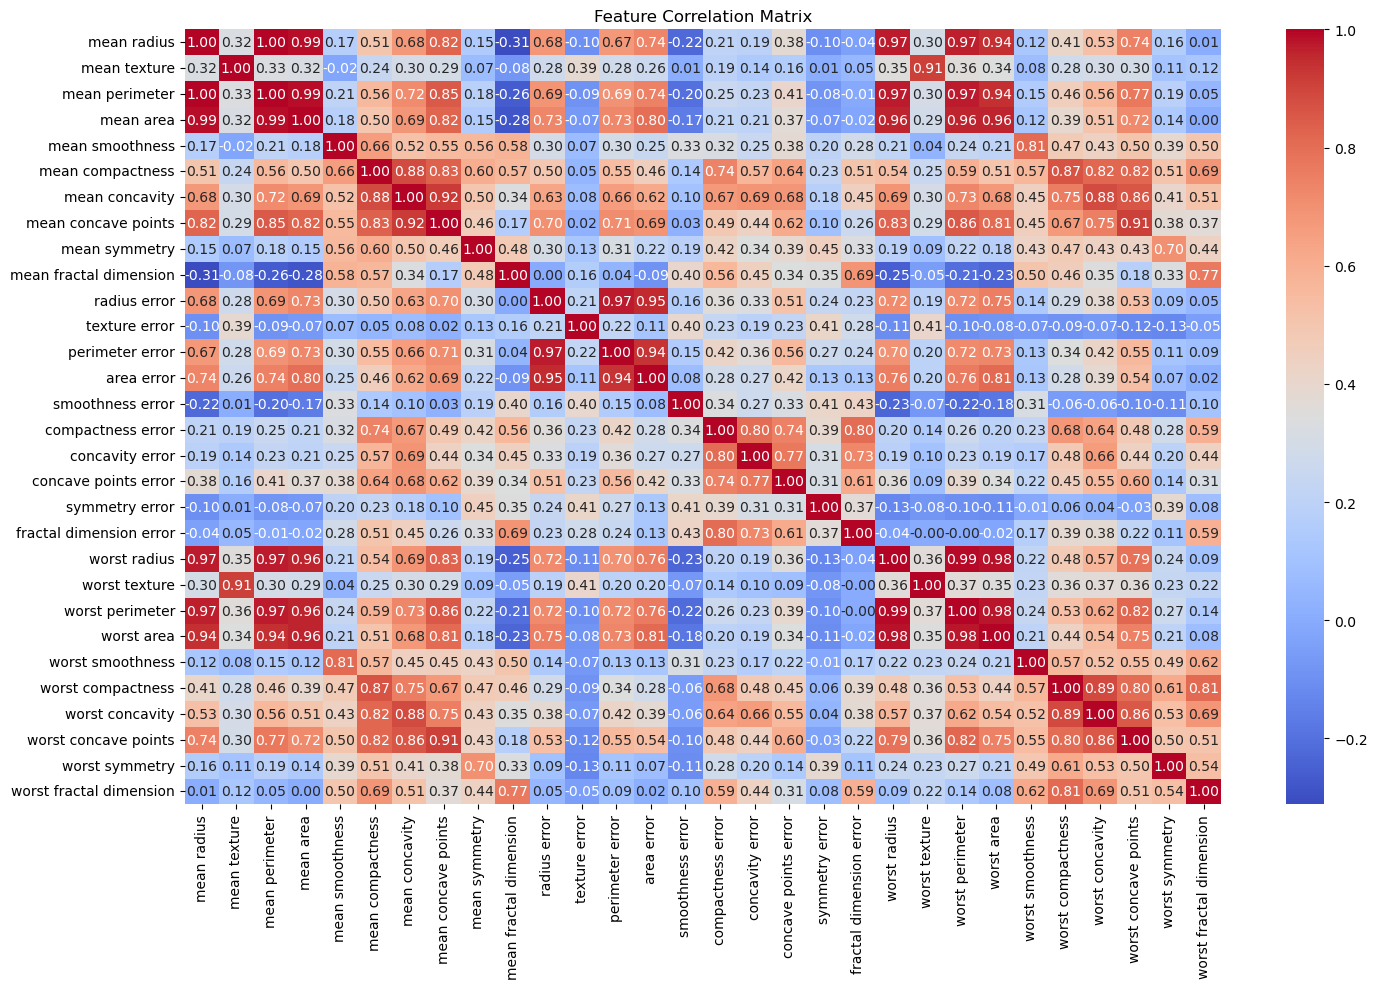

In [12]:
# Plot correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

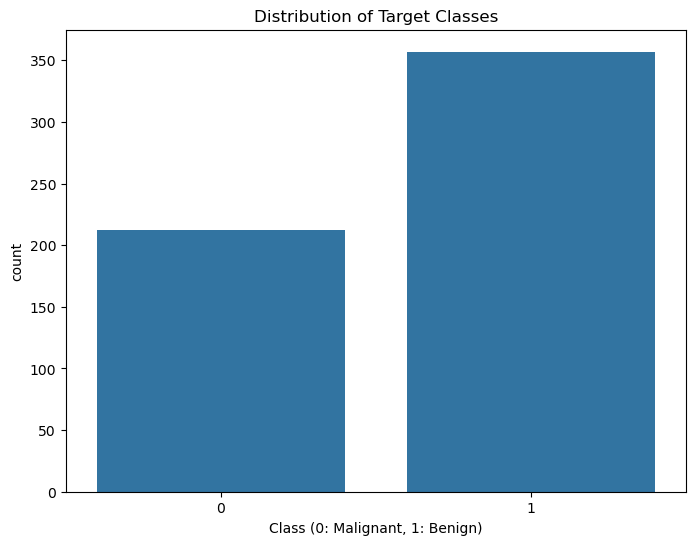

In [15]:
# Distribution of target classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Classes')
plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.show()

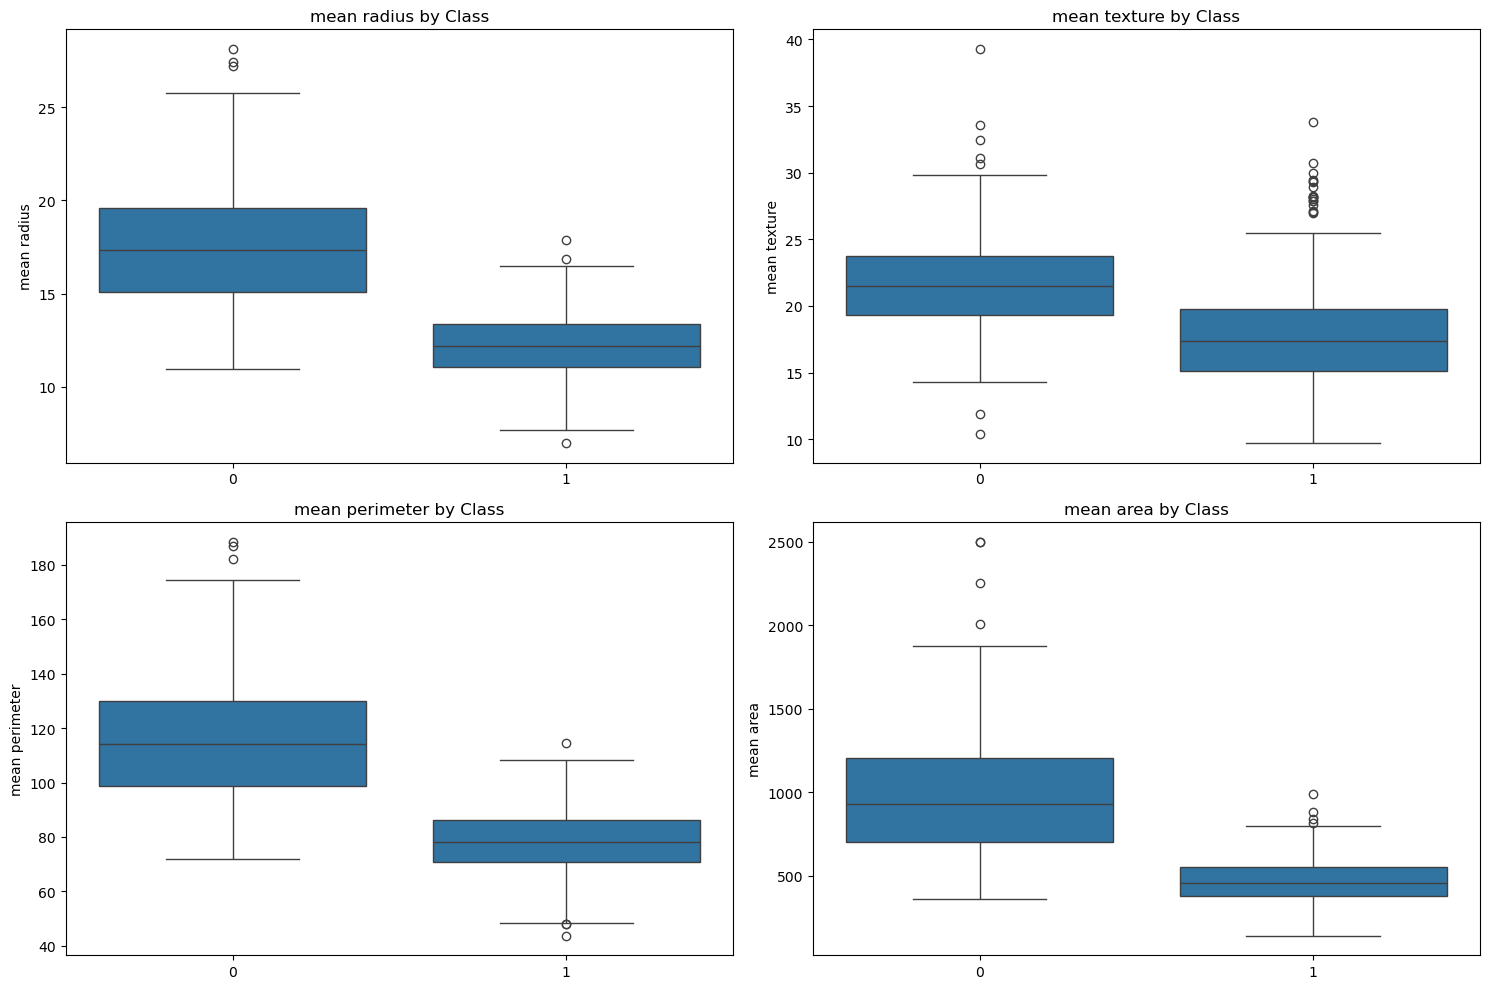

In [14]:
# Box plots for key features
plt.figure(figsize=(15, 10))
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=y, y=x[feature])
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()

In [16]:
# 4. Data Preprocessing
print("\nPreprocessing Data...")


Preprocessing Data...


In [17]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
scaler

StandardScaler()

In [18]:
corelation=x.corr()
corelation

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(corelation, cmap='coolwarm', center=0)
plt.title('Feature Corelation Matrix')
plt.tight_layout()
plt.show()

NameError: name 'corelation' is not defined

<Figure size 1200x800 with 0 Axes>

In [20]:
# Print highly corelated features (correlation > 0.9)
print("\nHighly corelated feature pairs (>0.9):")
for i in range(len(corelation.columns)):
    for j in range(i):
        if abs(corelation.iloc[i, j]) > 0.9:
            print(f"{corelation.columns[i]} <-> {corelation.columns[j]}")
            print(f"Correlation: {corelation.iloc[i, j]:.3f}")


Highly corelated feature pairs (>0.9):
mean perimeter <-> mean radius
Correlation: 0.998
mean area <-> mean radius
Correlation: 0.987
mean area <-> mean perimeter
Correlation: 0.987
mean concave points <-> mean concavity
Correlation: 0.921
perimeter error <-> radius error
Correlation: 0.973
area error <-> radius error
Correlation: 0.952
area error <-> perimeter error
Correlation: 0.938
worst radius <-> mean radius
Correlation: 0.970
worst radius <-> mean perimeter
Correlation: 0.969
worst radius <-> mean area
Correlation: 0.963
worst texture <-> mean texture
Correlation: 0.912
worst perimeter <-> mean radius
Correlation: 0.965
worst perimeter <-> mean perimeter
Correlation: 0.970
worst perimeter <-> mean area
Correlation: 0.959
worst perimeter <-> worst radius
Correlation: 0.994
worst area <-> mean radius
Correlation: 0.941
worst area <-> mean perimeter
Correlation: 0.942
worst area <-> mean area
Correlation: 0.959
worst area <-> worst radius
Correlation: 0.984
worst area <-> worst pe

In [21]:
#select k best (algoritham) anova, tset,chi square test

In [20]:
 # 2. SelectKBest with different scoring functions
# 2.1 F-Score (ANOVA rank base)
k_best_f = SelectKBest(score_func=f_classif, k=10)
x_kbest_f = k_best_f.fit_transform(x, y)
selected_features_f = x.columns[k_best_f.get_support()].tolist()
#print
selected_features_f

['mean radius',
 'mean perimeter',
 'mean area',
 'mean concavity',
 'mean concave points',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concavity',
 'worst concave points']

In [21]:
# 2.2 Mutual Information(previous data same test )
k_best_mi = SelectKBest(score_func=mutual_info_classif, k=10)
x_kbest_mi = k_best_mi.fit_transform(x, y)
selected_features_mi = x.columns[k_best_mi.get_support()].tolist()

In [22]:
selected_features_mi

['mean radius',
 'mean perimeter',
 'mean area',
 'mean concavity',
 'mean concave points',
 'area error',
 'worst radius',
 'worst perimeter',
 'worst area',
 'worst concave points']

In [25]:
#splitting(train test)

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [25]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
#feature selection

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
feature_names = data.feature_names

In [27]:
# Feature Selection using SelectKBest
def perform_feature_selection(x_train, x_test, y_train, k=10):
    # Initialize SelectKBest with f_classif scoring function
    selector = SelectKBest(score_func=f_classif, k=k)
    
    # Fit and transform the training data
    x_train_selected = selector.fit_transform(x_train, y_train)
    
    # Transform the test data
    x_test_selected = selector.transform(x_test)
    
    # Get selected feature names
    selected_features_mask = selector.get_support()
    selected_features = feature_names[selected_features_mask]
    
    # Get feature scores
    feature_scores = pd.DataFrame({
        'Feature': feature_names,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    return x_train_selected, x_test_selected, selected_features, feature_scores

In [28]:
# Perform feature selection
k_features = 10
x_train_selected, x_test_selected, selected_features, feature_scores = perform_feature_scores=perform_feature_selection(x_train_scaled,x_test_scaled,y_train,k=k_features)



In [29]:
print("\nTop 10 Selected Features:")
print("-" * 50)
for i, feature in enumerate(selected_features, 1):
    score = feature_scores[feature_scores['Feature'] == feature]['Score'].values[0]
    print(f"{i}. {feature}: {score:.2f}")


Top 10 Selected Features:
--------------------------------------------------
1. mean radius: 482.23
2. mean perimeter: 522.49
3. mean area: 423.65
4. mean concavity: 396.66
5. mean concave points: 695.18
6. worst radius: 645.35
7. worst perimeter: 681.26
8. worst area: 495.79
9. worst concavity: 331.33
10. worst concave points: 746.49


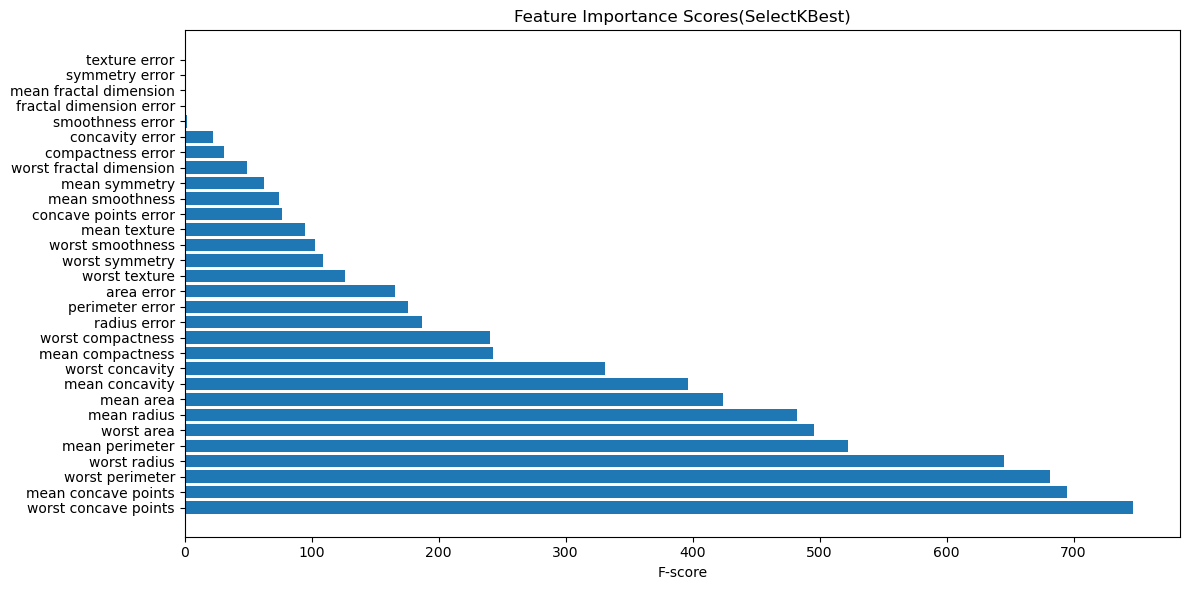

In [30]:
#Plot feature Score
plt.figure(figsize=(12,6))
plt.barh(range(len(feature_scores)), feature_scores['Score'])
plt.yticks(range(len(feature_scores)), feature_scores['Feature'], rotation=0)
plt.xlabel('F-score')
plt.title('Feature Importance Scores(SelectKBest)')
plt.tight_layout()
plt.show()


In [31]:
#logistic Regression
model_LR = LogisticRegression()
model_LR.fit(x_train,y_train)

LogisticRegression()

In [36]:
 #predit the model

In [32]:
ypred_LR=model_LR.predict(x_test)
ypred_LR

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [33]:
accuracy_LR = accuracy_score(y_test,ypred_LR)
accuracy_LR


0.9649122807017544

In [39]:
#classification report

In [34]:
print("\nClassification Report:")
print(classification_report(y_test, ypred_LR))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



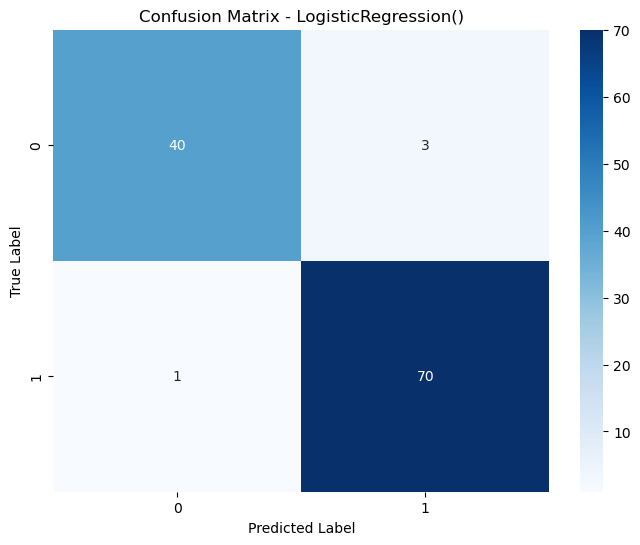

In [41]:
# Plot confusion matrix
cm = confusion_matrix(y_test, ypred_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_LR}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [42]:
#Decision Tree

In [38]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Make predictions
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



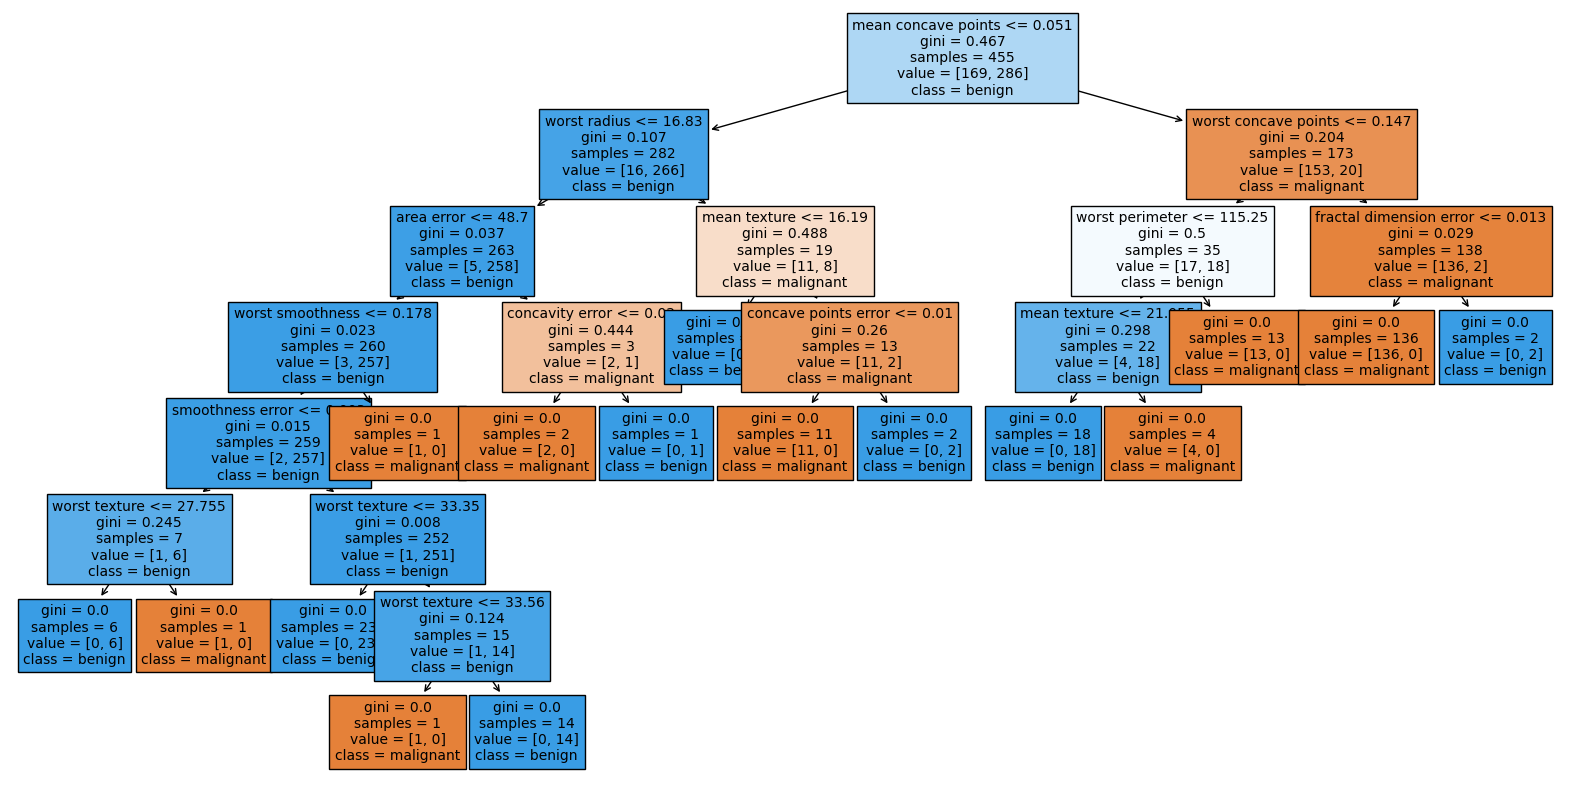

In [42]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True, fontsize=10)
plt.show()

In [48]:
# KNN(k-Nearest Neibour)

In [19]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [21]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default: 5 neighbors
knn_model.fit(x_train_scaled, y_train)


KNeighborsClassifier()

In [22]:
# Make predictions
y_pred = knn_model.predict(x_test_scaled)


In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [54]:
#Random Forest Classifer

In [47]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Using 100 trees
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
# Make predictions
y_pred = rf_model.predict(x_test)


In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [59]:
#SVM(support Vector Machine)

In [15]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,)

In [40]:
# Scale the features
print("\nScaling features...")
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Scaling features...


In [46]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # Using a linear kernel
svm_model.fit(x_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [48]:
# Make predictions
y_pred = svm_model.predict(x_test_scaled)


In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [54]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier()
}

In [56]:
# Train and evaluate models
results = {}
print("\nTraining and evaluating models...\n")
for name, clf in classifiers.items():
    # Train
    clf.fit(x_train, y_train)
    # Predict
    y_pred = clf.predict(x_test)
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")


Training and evaluating models...

Logistic Regression Accuracy: 0.9561
Decision Tree Accuracy: 0.9474
Random Forest Accuracy: 0.9649
SVM Accuracy: 0.9474
k-NN Accuracy: 0.9561


In [57]:
# Compare results
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)

print("\nModel Comparison:")
print(f"Best Model: {best_model} with Accuracy: {results[best_model]:.4f}")
print(f"Worst Model: {worst_model} with Accuracy: {results[worst_model]:.4f}")


Model Comparison:
Best Model: Random Forest with Accuracy: 0.9649
Worst Model: Decision Tree with Accuracy: 0.9474


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'SVM'),
  Text(4, 0, 'k-NN')])

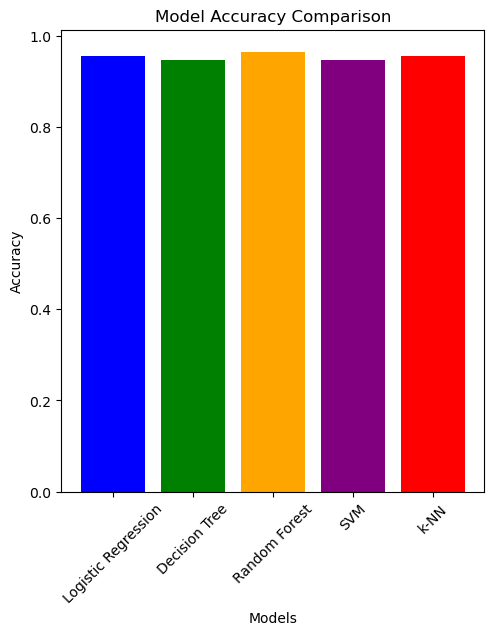

In [58]:
# Plot Accuracy Bar Chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)